In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

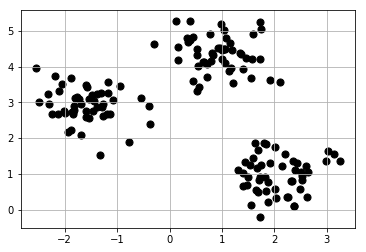

In [19]:
X, y = make_blobs(n_samples=150, n_features=2, centers=3, cluster_std=0.5, shuffle=True, random_state=0)
plt.scatter(X[:, 0], X[:, 1], c='black', marker='o', s=50)
plt.grid()
plt.show()

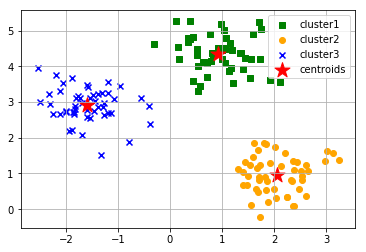

In [18]:
km = KMeans(n_clusters=3, init='random', n_init=10, max_iter=300, tol=1e-4, random_state=0)
km.fit(X)
y_pred = km.predict(X)
colors = ['green', 'orange', 'blue']
markers = ['s', 'o', 'x']
for idx, tag in enumerate(np.unique(y_pred)):
    label = 'cluster' + str(idx+1)
    plt.scatter(X[y_pred == tag, 0], 
                X[y_pred == tag, 1], 
                c=colors[idx], 
                marker=markers[idx], 
                label=label)
plt.scatter(km.cluster_centers_[:, 0], 
            km.cluster_centers_[:, 1], 
            s=250, 
            marker='*', 
            c='red', 
            label='centroids')
plt.legend()
plt.grid()
plt.show()

In [21]:
print("the Distortion: %.2f" % km.inertia_)

the Distortion: 72.48


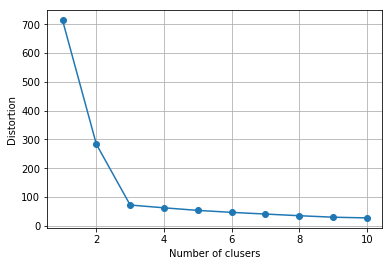

In [23]:
# the elbow method to find k
distortions = []
k_num_list = list(range(1, 11))
for k in k_num_list:
    km = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=0)
    km.fit(X)
    distortions.append(km.inertia_)
plt.plot(k_num_list, distortions, marker='o')
plt.xlabel('Number of clusers')
plt.ylabel('Distortion')
plt.grid()
plt.show()

In [25]:
# the Silhouette method to evaluate cluster quality
km = KMeans(n_clusters=3, init='k-means++', n_init=10, max_iter=300, tol=1e-4, random_state=0)

In [26]:
y_km = km.fit_predict(X)

In [36]:
def plot_silhouette(X, y_km, metric='euclidean'):
    from matplotlib import cm
    from sklearn.metrics import silhouette_samples
    cluster_labels = np.unique(y_km)
    n_clusters = len(cluster_labels)
    silhouette_vals = silhouette_samples(X=X, labels=y_km, metric='euclidean')
    y_ax_lower, y_ax_upper = 0, 0
    # 保存每个 y轴标签的垂直位置
    y_ticks = []
    for i, c in enumerate(cluster_labels):
        c_silhouette_vals = silhouette_vals[y_km == c]
        c_silhouette_vals.sort()
        y_ax_upper += len(c_silhouette_vals)
        color = cm.jet(i / n_clusters)
        plt.barh(range(y_ax_lower, y_ax_upper), 
                 c_silhouette_vals, 
                 height=1.0, 
                 edgecolor='none', 
                 color=color)
        y_ticks.append((y_ax_lower + y_ax_upper) / 2)
        y_ax_lower += len(c_silhouette_vals)
    silhouette_avg = np.mean(silhouette_vals)
    plt.axvline(silhouette_avg, color='red', linestyle='--')
    plt.yticks(y_ticks, cluster_labels+1)
    plt.ylabel('Cluster')
    plt.xlabel('Silhouette coef')
    plt.show()
    

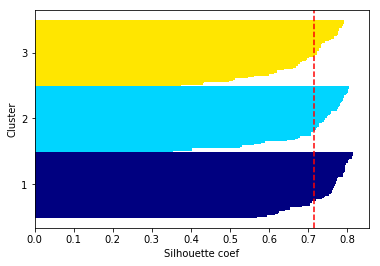

In [37]:
plot_silhouette(X, y_km)

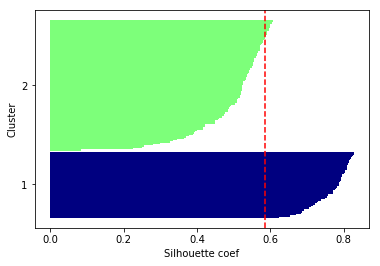

In [39]:
# plot silhouette for n_clusters=2
km2 = KMeans(n_clusters=2, init='k-means++', n_init=10, max_iter=300, tol=1e-4, random_state=0)
y_km2 = km2.fit_predict(X)
plot_silhouette(X, y_km2)